In [1]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("Day_data.csv")

In [54]:
df.shape

(7493, 3)

In [55]:
df1=df.loc[:1327]

In [56]:
df1.shape

(1328, 3)

In [57]:
df1.head()

,Date,Amount,Requests
0,8/31/2018,"$4,024,445,818.00",27093468
1,8/30/2018,"$3,976,825,461.00",26166131
2,8/29/2018,"$3,792,906,317.00",25586892
3,8/28/2018,"$3,809,151,761.00",25721457
4,8/27/2018,"$3,916,557,671.00",25521502


In [58]:
df1.tail()

,Date,Amount,Requests
1323,1/5/2015,"$3,607,383,937.00",21987692
1324,1/4/2015,"$1,880,749,432.00",17326812
1325,1/3/2015,"$1,985,177,208.00",18952939
1326,1/2/2015,"$3,005,824,417.00",22178651
1327,1/1/2015,"$1,549,971,610.00",14700525


In [59]:
df1=df1[::-1]

In [60]:
df1.head()

,Date,Amount,Requests
1327,1/1/2015,"$1,549,971,610.00",14700525
1326,1/2/2015,"$3,005,824,417.00",22178651
1325,1/3/2015,"$1,985,177,208.00",18952939
1324,1/4/2015,"$1,880,749,432.00",17326812
1323,1/5/2015,"$3,607,383,937.00",21987692


In [61]:
df1.tail()

,Date,Amount,Requests
4,8/27/2018,"$3,916,557,671.00",25521502
3,8/28/2018,"$3,809,151,761.00",25721457
2,8/29/2018,"$3,792,906,317.00",25586892
1,8/30/2018,"$3,976,825,461.00",26166131
0,8/31/2018,"$4,024,445,818.00",27093468


In [63]:
df1=df1.reset_index()['Requests']

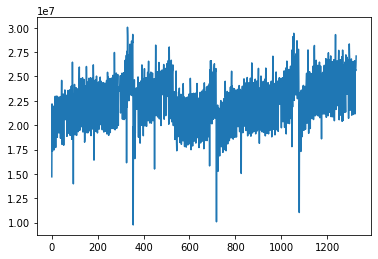

In [64]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [65]:
df1.head()

0    14700525
1    22178651
2    18952939
3    17326812
4    21987692
Name: Requests, dtype: int64

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [67]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [68]:
training_size,test_size

(863, 465)

In [69]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [70]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [71]:
print(X_train.shape), print(y_train.shape)

(762, 100)
(762,)


(None, None)

In [72]:
print(X_test.shape), print(ytest.shape)

(364, 100)
(364,)


(None, None)

In [73]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [74]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [75]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 293ms/step - loss: 0.1100 - val_loss: 0.0260
Epoch 2/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0182 - val_loss: 0.0143
Epoch 3/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0136 - val_loss: 0.0169
Epoch 4/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0122 - val_loss: 0.0132
Epoch 5/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0119 - val_loss: 0.0127
Epoch 6/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0119 - val_loss: 0.0137
Epoch 7/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0119 - val_loss: 0.0126
Epoch 8/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0120 - val_loss: 0.0131
Epoch 9/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0120 - val_loss: 0.0125
Epoch 10/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0119 - val_lo

In [77]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [78]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [79]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

22899106.718848445

In [80]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

23890447.48828756

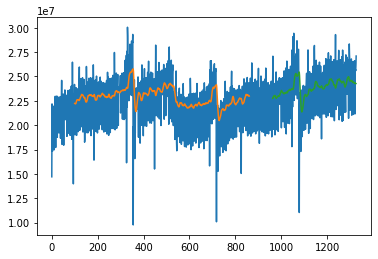

In [82]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [83]:
len(test_data)

465

In [84]:
x_input=test_data[365:].reshape(1,-1)
x_input.shape

(1, 100)

In [85]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
# demonstrate prediction for next 8 Months
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 Day input [0.83548905 0.6728573  0.55517453 0.79901111 0.78867157 0.79984508
 0.83566209 0.85071834 0.52414715 0.74471399 0.88441507 0.81528719
 0.52847821 0.74441455 0.7615396  0.62336544 0.56927577 0.80957657
 0.7879251  0.7795816  0.8084783  0.82451031 0.65457453 0.57047125
 0.86038036 0.85398888 0.7963912  0.79842648 0.8492844  0.66094358
 0.77921561 0.77153572 0.78862237 0.81702343 0.83655434 0.67552819
 0.53936027 0.76597251 0.7906296  0.91546231 0.85998568 0.83361936
 0.66669684 0.580406   0.78536361 0.76990779 0.82924665 0.80732788
 0.83962863 0.66377843 0.55513731 0.78043333 0.77599905 0.80639589
 0.80873673 0.8264963  0.66214892 0.55901792 0.77749673 0.76299297
 0.77827756 0.7954     0.83048281 0.67505142 0.5616088  0.77686635
 0.7867238  0.78008997 0.80864548 0.85436163 0.71878326 0.7225771
 0.72620219 0.72894132 0.73043275 0.73060244 0.72957397 0.7275787
 0.72488737 0.72175997 0.71841967 0.71503937 0.7117421  0.70860595
 0.70567471 0.70296603 0.700481   0.69821066 0.69614

In [88]:
len(df1)

1328

In [90]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [94]:
scaler.inverse_transform(lst_output)

array([[23599068.6327095 ],
       [23586999.79149199],
       [23575892.15331674],
       [23565593.37656951],
       [23555974.09178424],
       [23546923.06540132],
       [23538333.90010285],
       [23530118.33447742],
       [23522208.66114092],
       [23514548.0542531 ],
       [23507074.85173202],
       [23499768.49955034],
       [23492592.72589517],
       [23485530.60392046],
       [23478579.71550536],
       [23471720.71568298],
       [23464960.85881591],
       [23458308.60832715],
       [23451762.75515628],
       [23445339.01708889],
       [23439039.81224585],
       [23432882.06747317],
       [23426874.24619389],
       [23421028.43901229],
       [23415357.94559312],
       [23409863.97499681],
       [23404556.19970679],
       [23399443.0831461 ],
       [23394531.8796773 ],
       [23389818.9621191 ]])

In [95]:
scaler.inverse_transform(df1[1228:])

array([[25577099.],
       [25965672.],
       [26716377.],
       [23036545.],
       [20455313.],
       [21947145.],
       [24784903.],
       [25060052.],
       [26038239.],
       [29293802.],
       [23698669.],
       [21612732.],
       [25918613.],
       [25707727.],
       [25910597.],
       [26186278.],
       [26597468.],
       [23309053.],
       [22005024.],
       [26010553.],
       [25762962.],
       [26288623.],
       [26607297.],
       [27676497.],
       [23597895.],
       [20554266.],
       [25761838.],
       [25372249.],
       [26153427.],
       [26229998.],
       [26710644.],
       [23411713.],
       [21024557.],
       [25970701.],
       [25760967.],
       [25987618.],
       [26714154.],
       [27019565.],
       [20395177.],
       [24869302.],
       [27703092.],
       [26300856.],
       [20483031.],
       [24863228.],
       [25210604.],
       [22407787.],
       [21310596.],
       [26185018.],
       [25745825.],
       [25576580.],


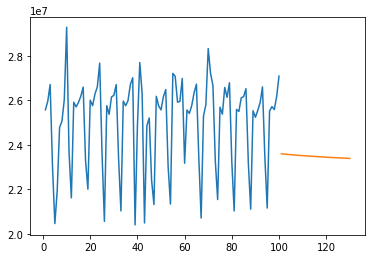

In [91]:
plt.plot(day_new,scaler.inverse_transform(df1[1228:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [92]:
df3=df1.tolist()
df3.extend(lst_output)

In [101]:
len(df3)

1358

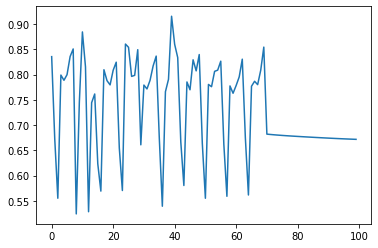

In [103]:
plt.plot(df3[1258:1358])